In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pfe import Mesh, Model, Constant
from pfe.interpolation import Lagrange2
from pfe.models import lpe_2d

In [2]:
freq = 3.2
omega = 2*np.pi*freq

In [3]:
mesh = Mesh('domain.msh', num_dim=2)

Opening mesh domain.msh
Reading 18276 nodes
Reading elements...
* 244 elements Line 3
* 9016 elements Triangle 6
Reading groups...
* group 0: 9016 elements
* group 1: 212 elements
* group 2: 32 elements


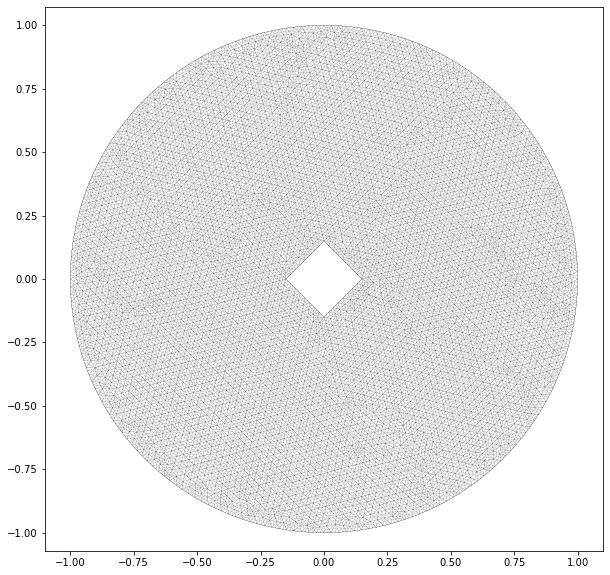

In [4]:
plt.figure(figsize=(10,10))
mesh.plot()
plt.axis("equal")
# plt.xlim(-0.1, +0.1)
# plt.ylim(-0.1, +0.1)
plt.show()


Allocating fields...
* Field phi: 18276 DOFs
Total: 18276 DOFs

Building model...
* Group Main
* Group CBC
* Group Velocity
Time: 1.4013s
Global system: 18276 DOFs, 208344 non-zero entries

Solving model...
Time: 0.4906s


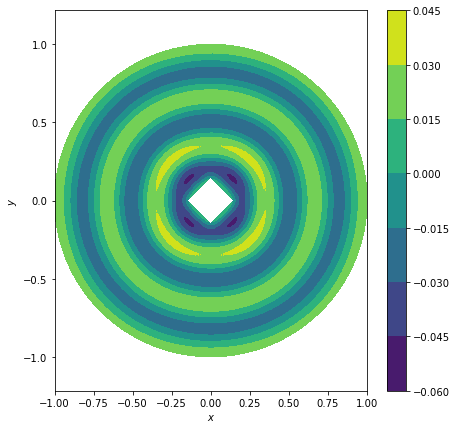

In [5]:
model = Model()

model.parameters['omega'] = Constant(omega)
model.parameters['rho0'] = Constant(1.0)
model.parameters['c0'] = Constant(1.0)
model.parameters['u0'] = Constant(0.0)
model.parameters['v0'] = Constant(0.0)

model.fields['phi'] = Lagrange2(mesh)

model.add_term(lpe_2d.Main(mesh.group(0)))
model.add_term(lpe_2d.CBC(mesh.group(1)))
model.add_term(lpe_2d.Velocity(mesh.group(2), Constant(1.0)))

model.declare_fields()
model.build()
model.solve()

plt.figure(figsize=(7,7))
model.fields['phi'].plot(np.real(model.solution))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.colorbar()
plt.show()